In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
folder_path = r"D:\USTH\Year_3\Internship\DeffendThesis\Defend-Thesis\Data"
file_name = "Data_UF_cleaned.xlsx"


df = pd.read_excel(f"{folder_path}\\{file_name}")

In [4]:
print("=== INFO ===")
print(df.info())

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23623 entries, 0 to 23622
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract_ID       21593 non-null  object 
 1   Giới tính         23623 non-null  int64  
 2   Vùng              21593 non-null  object 
 3   CN quản lý        21593 non-null  object 
 4   Đơn vị bán hàng   5514 non-null   object 
 5   CN bán            19832 non-null  object 
 6   Vùng bán          19832 non-null  object 
 7   Ngày tạo          23623 non-null  object 
 8   OrderID/RegCode   16282 non-null  object 
 9   Transaction code  1254 non-null   object 
 10  Type              16927 non-null  object 
 11  Câu lệnh gói FG   23622 non-null  object 
 12  Tháng TT          23623 non-null  int64  
 13  Doanh thu         23622 non-null  float64
 14  Kênh bán          22490 non-null  object 
 15  Status FGame      23623 non-null  object 
 16  Ngày active       23623 non

In [69]:
print("\n=== DESCRIBE ===")
print(df.describe(include='all'))


=== DESCRIBE ===
                  Contract_ID            Vùng CN quản lý Đơn vị bán hàng  \
count                   21593           21593      21593            5514   
unique                  21540              15         69              16   
top     HD4018334318042840576  07.Ho Chi Minh     HCM_04             IBB   
freq                        3           15030      13516            4030   
mean                      NaN             NaN        NaN             NaN   
std                       NaN             NaN        NaN             NaN   
min                       NaN             NaN        NaN             NaN   
25%                       NaN             NaN        NaN             NaN   
50%                       NaN             NaN        NaN             NaN   
75%                       NaN             NaN        NaN             NaN   
max                       NaN             NaN        NaN             NaN   

            CN bán        Vùng bán    Ngày tạo  OrderID/RegCode  \
co

In [70]:
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())




=== MISSING VALUES ===
Contract_ID          2030
Vùng                 2030
CN quản lý           2030
Đơn vị bán hàng     18109
CN bán               3791
Vùng bán             3791
Ngày tạo                0
OrderID/RegCode      7341
Transaction code    22369
Type                 6696
Câu lệnh gói FG         1
Tháng TT                0
Doanh thu               1
Kênh bán             1133
Status FGame            0
Ngày active          2924
Ngày SD từ           8063
Ngày SD đến          8063
Gói internet         2924
Ngày hủy            10199
Hình thức bán           0
dtype: int64


In [71]:
# Remove row contain "Bundle"
df = df[df['Hình thức bán'] != 'Bundle']


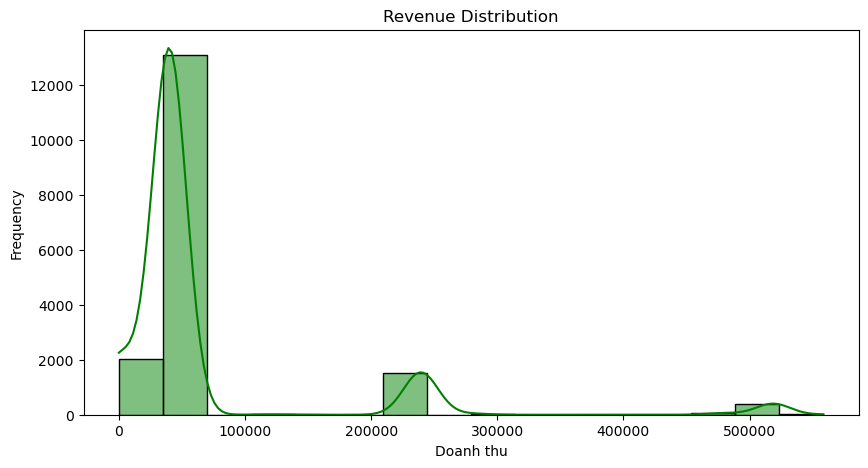

In [72]:
# ---------------------------
# 2. REVENUE DISTRIBUTION
# ---------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['Doanh thu'], kde=True, color='green')
plt.title('Revenue Distribution')
plt.xlabel('Doanh thu')
plt.ylabel('Frequency')
plt.show()

In [76]:
from dateutil import parser
# Force full parsing first (convert all to datetime)
def parse_mixed_date_force(date_str):
    try:
        return pd.to_datetime(str(date_str), dayfirst=True, errors='coerce')
    except:
        return pd.NaT

df['Ngày tạo'] = df['Ngày tạo'].apply(parse_mixed_date_force)

# Now format to consistent dd/mm/yyyy
df['Ngày tạo'] = pd.to_datetime(df['Ngày tạo'], format='%d/%m/%Y', errors='coerce')
    
# Group by month and compute total revenue
df['month'] = df['Ngày tạo'].dt.to_period('M')
monthly_revenue = df.set_index('Ngày tạo').resample('M')['Doanh thu'].sum()
monthly_revenue = monthly_revenue[monthly_revenue > 0].reset_index()




df

C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_12840\1066998067.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(str(date_str), dayfirst=True, errors='coerce')
C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_12840\1066998067.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('Ngày tạo').resample('M')['Doanh thu'].sum()


,Contract_ID,Vùng,CN quản lý,Đơn vị bán hàng,CN bán,Vùng bán,Ngày tạo,OrderID/RegCode,Transaction code,Type,...,Doanh thu,Kênh bán,Status FGame,Ngày active,Ngày SD từ,Ngày SD đến,Gói internet,Ngày hủy,Hình thức bán,month
0,HD1262187733434228224,07.Ho Chi Minh,HCM_02,NaN,NaN,NaN,2024-01-01,FG00027082,UTMN_1_3107783,Code,...,39900.0,Hi-FPT,Đã hủy,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-02 00:00:00,Meta,01/02/2024,Code,2024-01
1,HD138975645429405536,07.Ho Chi Minh,HCM_04,NaN,NaN,NaN,2024-01-01,FG00027050,UTMN_1_3107458,Code,...,39900.0,Hi-FPT,Đã hủy,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-02 00:00:00,Meta,01/02/2024,Code,2024-01
2,HD1415792837332678912,07.Ho Chi Minh,HCM_03,NaN,NaN,NaN,2024-01-01,FG00027095,UTMN_1_3107901,Code,...,39900.0,Hi-FPT,Đã hủy,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-02 00:00:00,Meta,01/02/2024,Code,2024-01
3,HD1594279484202634496,11.Tay Bac Bo,PTO,NaN,NaN,NaN,2024-01-01,FG00027102,UTMB_1_3107929,Code,...,39900.0,Hi-FPT,Đã hủy,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-02 00:00:00,Sky,01/02/2024,Code,2024-01
6,HD2492698124504546304,07.Ho Chi Minh,HCM_01,NaN,NaN,NaN,2024-01-01,FG00027044,UTMN_1_3107448,Code,...,39900.0,Hi-FPT,Đã hủy,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-02 00:00:00,Meta,01/02/2024,Code,2024-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23617,HD8580153456998903808,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-12-31,SGK30213809,NaN,Code,...,39900.0,Hi-FPT,Đã hủy,31/12/2024,31/12/2024,31/01/2025,Meta,31/01/2025,Code,2024-12
23618,HD866678989154166144,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-12-31,SGK30212750,NaN,Code,...,39900.0,Hi-FPT,Đã hủy,31/12/2024,31/12/2024,31/01/2025,Sky,31/01/2025,Code,2024-12
23619,HD8982285178629733376,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-12-31,SGK30213328,NaN,Code,...,239400.0,Hi-FPT,Đã kích hoạt,31/12/2024,31/12/2024,30/06/2025,Sky,NaN,Code,2024-12
23620,HD9039558116633409536,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-12-31,SGK30213608,NaN,Code,...,518700.0,Hi-FPT,Đã kích hoạt,31/12/2024,31/12/2024,31/01/2026,Sky,NaN,Code,2024-12


In [74]:
#df.to_excel('output.xlsx', index=False)


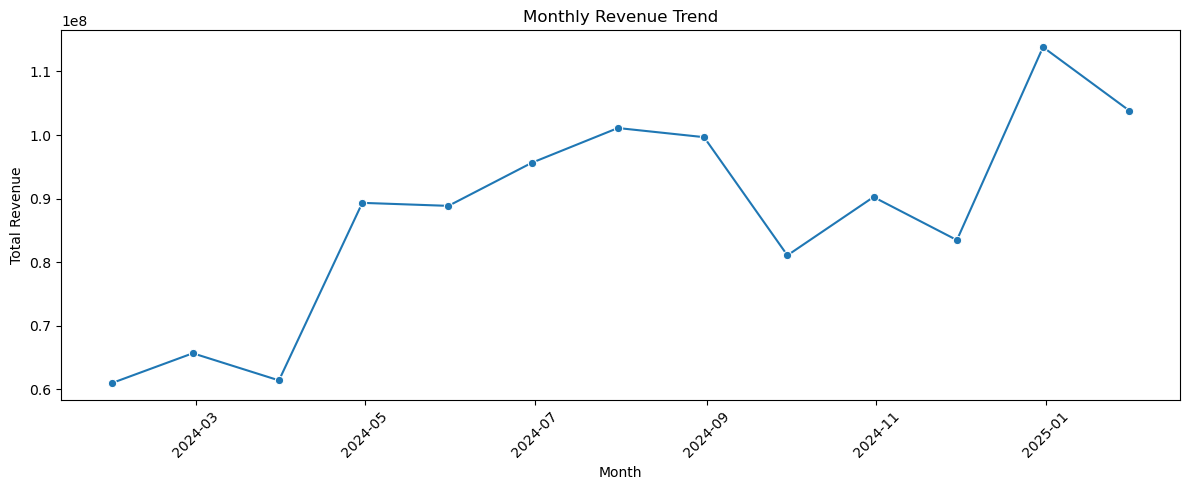

Month-over-Month Revenue Changes:
     Ngày tạo    Doanh thu  Doanh thu_diff  Doanh thu_pct_change
0  2024-01-31   61007100.0             NaN                   NaN
1  2024-02-29   65675400.0       4668300.0              7.652060
2  2024-03-31   61406100.0      -4269300.0             -6.500608
3  2024-04-30   89336100.0      27930000.0             45.484081
4  2024-05-31   88862400.0       -473700.0             -0.530245
5  2024-06-30   95640300.0       6777900.0              7.627410
6  2024-07-31  101106600.0       5466300.0              5.715478
7  2024-08-31   99670200.0      -1436400.0             -1.420679
8  2024-09-30   81076800.0     -18593400.0            -18.654924
9  2024-10-31   90253800.0       9177000.0             11.318898
10 2024-11-30   83476200.0      -6777600.0             -7.509490
11 2024-12-31  113834700.0      30358500.0             36.367851
12 2025-01-31  103859700.0      -9975000.0             -8.762706


In [80]:


# ---------------------------
# 5. Compute changes
# ---------------------------
monthly_revenue['Doanh thu_diff'] = monthly_revenue['Doanh thu'].diff()
monthly_revenue['Doanh thu_pct_change'] = monthly_revenue['Doanh thu'].pct_change() * 100

# ---------------------------
# 6. Plot Monthly Revenue
# ---------------------------
plt.figure(figsize=(12, 5))
sns.lineplot(x='Ngày tạo', y='Doanh thu', data=monthly_revenue, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Optional: Show MoM changes
# ---------------------------
print("Month-over-Month Revenue Changes:")
print(monthly_revenue[['Ngày tạo', 'Doanh thu', 'Doanh thu_diff', 'Doanh thu_pct_change']])

In [81]:
monthly_revenue

,Ngày tạo,Doanh thu,Doanh thu_diff,Doanh thu_pct_change
0,2024-01-31,61007100.0,NaN,NaN
1,2024-02-29,65675400.0,4668300.0,7.652060
2,2024-03-31,61406100.0,-4269300.0,-6.500608
3,2024-04-30,89336100.0,27930000.0,45.484081
4,2024-05-31,88862400.0,-473700.0,-0.530245
5,2024-06-30,95640300.0,6777900.0,7.627410
6,2024-07-31,101106600.0,5466300.0,5.715478
7,2024-08-31,99670200.0,-1436400.0,-1.420679
8,2024-09-30,81076800.0,-18593400.0,-18.654924
9,2024-10-31,90253800.0,9177000.0,11.318898


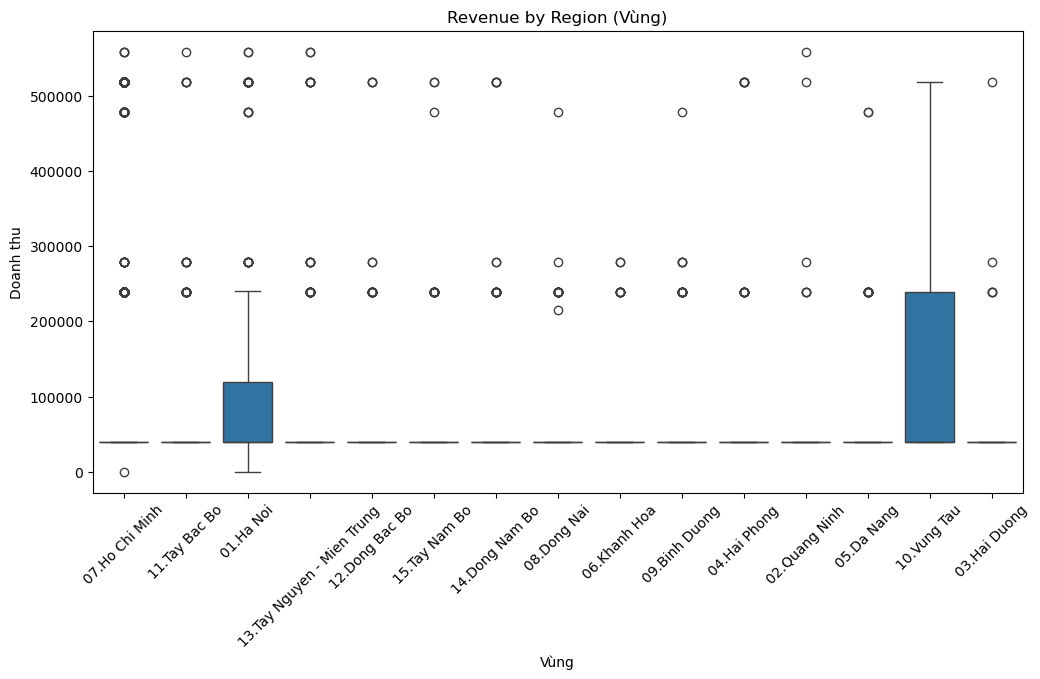


=== AVERAGE REVENUE BY REGION ===
Vùng
10.Vung Tau                   110556.250000
13.Tay Nguyen - Mien Trung    106302.919708
01.Ha Noi                     104365.714286
04.Hai Phong                   96169.230769
11.Tay Bac Bo                  96085.714286
05.Da Nang                     92352.808989
14.Dong Nam Bo                 90194.117647
12.Dong Bac Bo                 87188.888889
02.Quang Ninh                  85785.000000
06.Khanh Hoa                   85639.024390
03.Hai Duong                   83790.000000
15.Tay Nam Bo                  78214.569536
08.Dong Nai                    76340.540541
09.Binh Duong                  75066.101695
07.Ho Chi Minh                 72867.326733
Name: Doanh thu, dtype: float64


In [82]:
# ---------------------------
# 4. REVENUE BY REGION
# ---------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vùng', y='Doanh thu', data=df)
plt.title('Revenue by Region (Vùng)')
plt.xticks(rotation=45)
plt.show()

region_avg = df.groupby('Vùng')['Doanh thu'].mean().sort_values(ascending=False)
print("\n=== AVERAGE REVENUE BY REGION ===")
print(region_avg)

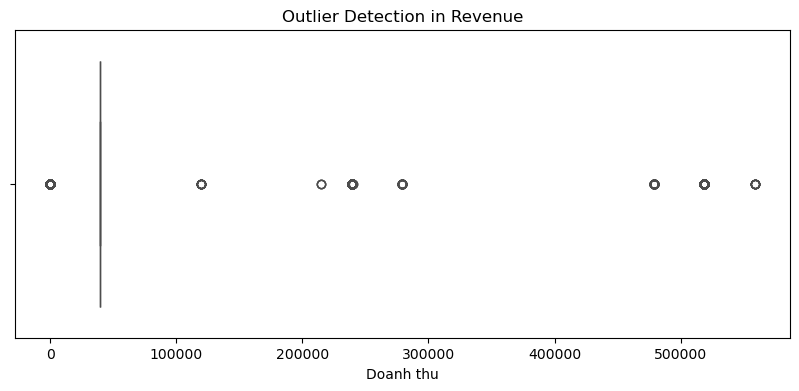

In [83]:
# ---------------------------
# 5. OUTLIER DETECTION
# ---------------------------
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Doanh thu'], color='orange')
plt.title("Outlier Detection in Revenue")
plt.show()

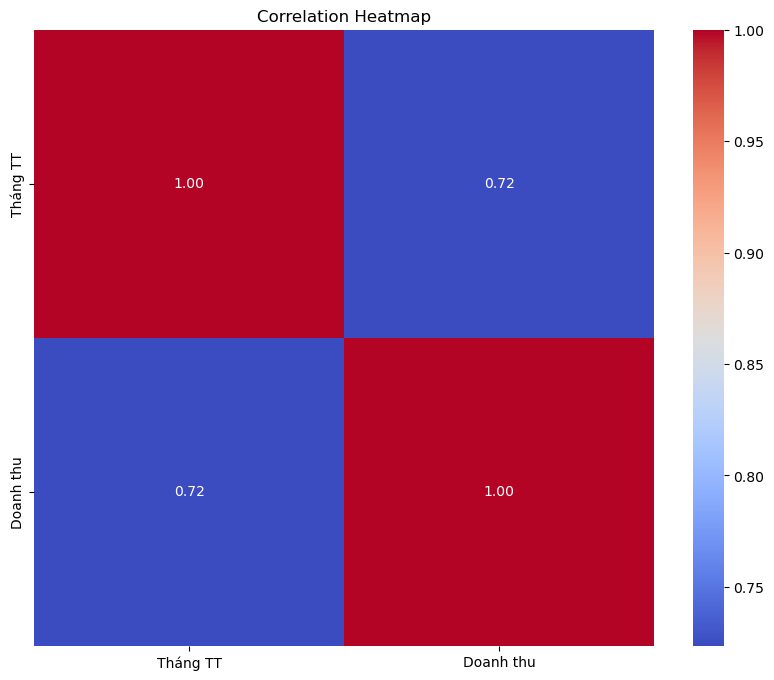

In [84]:

# ---------------------------
# 6. CORRELATION MATRIX
# ---------------------------
df_numeric = df.select_dtypes(include='number')
corr = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


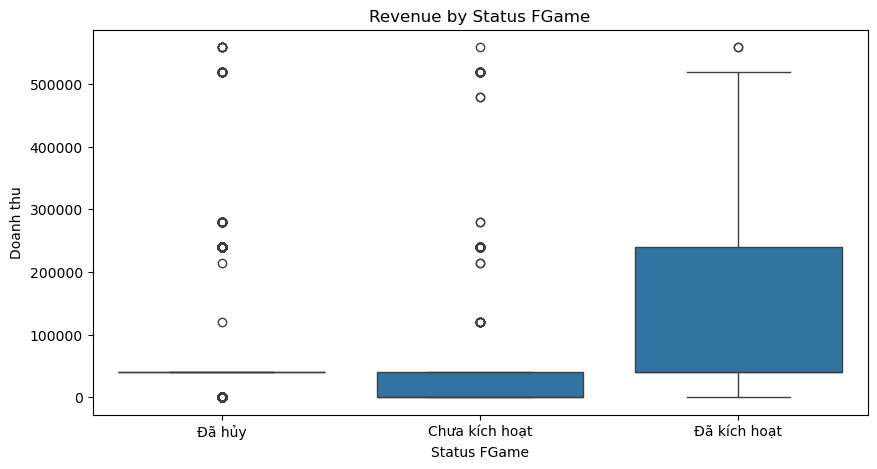

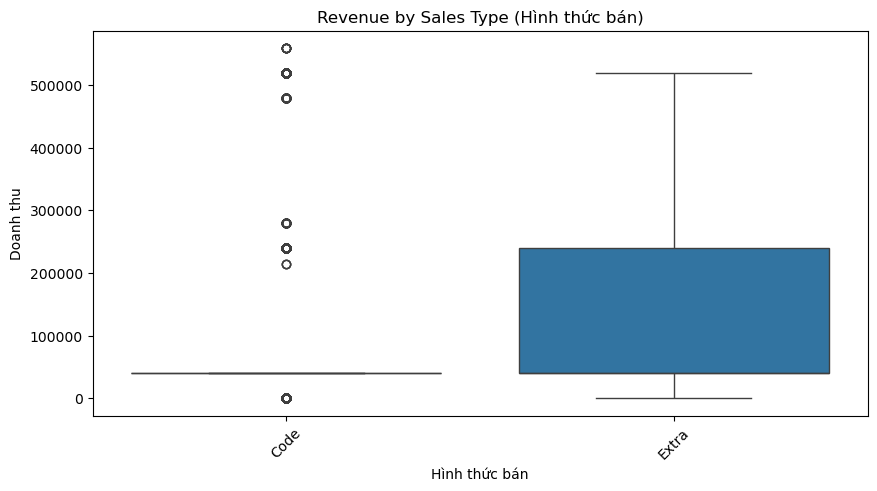

In [85]:
# ---------------------------
# 7. FEATURE-TARGET RELATIONSHIPS
# ---------------------------
plt.figure(figsize=(10, 5))
sns.boxplot(x='Status FGame', y='Doanh thu', data=df)
plt.title('Revenue by Status FGame')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Hình thức bán', y='Doanh thu', data=df)
plt.title('Revenue by Sales Type (Hình thức bán)')
plt.xticks(rotation=45)
plt.show()

### Gender

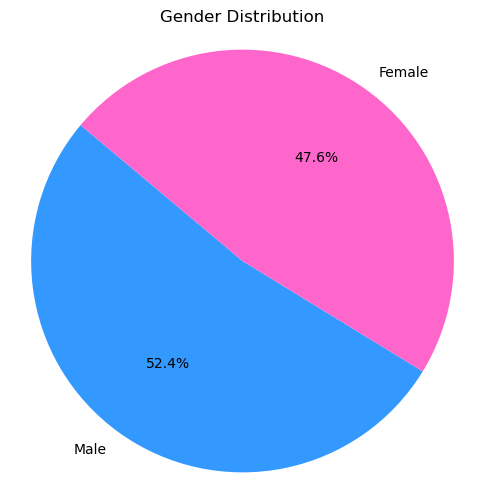

In [35]:
# 0:Nam 1:Nữ 
gender_counts = df['Giới tính'].value_counts()

labels = ['Male','Female']
sizes = [gender_counts.get(0,0), gender_counts.get(1,0)]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#3399FF', '#FF66CC'], startangle=140)
plt.title('Gender Distribution')
plt.axis('equal') 
plt.show()

### Age range

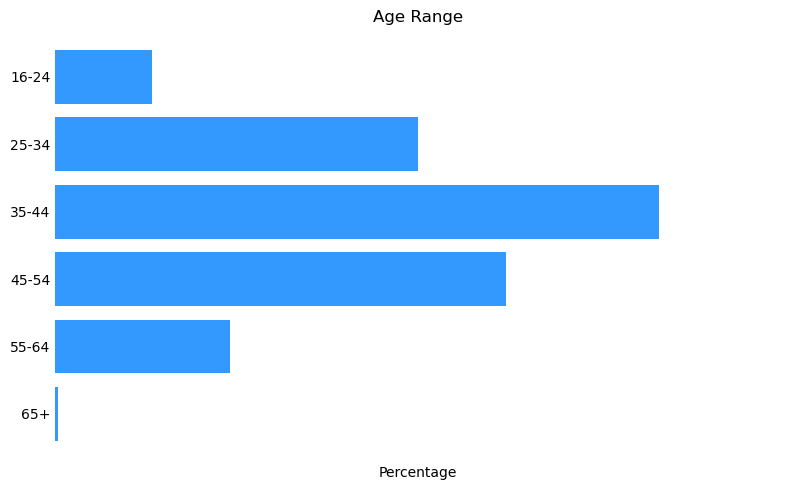

In [32]:
bins = [16, 24, 34, 44, 54, 64, 100]
labels = ['16-24', '25-34', '35-44', '45-54', '55-64', '65+']


# Step 3: Create a new column with age ranges
df['Age Range'] = pd.cut(df['Tuổi'], bins=bins, labels=labels, right=True)

# Step 4: Count and normalize
age_groups_order = labels
age_counts = df['Age Range'].value_counts().reindex(age_groups_order, fill_value=0)
age_proportions = age_counts / age_counts.sum()

# Step 5: Plot
plt.figure(figsize=(8, 5))
plt.barh(age_groups_order, age_proportions, color='#3399FF')

plt.xlabel('Percentage')
plt.title('Age Range')

# Fix x-axis limit
max_value = age_proportions.max()
if max_value == 0:
    max_value = 1
plt.xlim(0, max_value * 1.2)

plt.xticks([])  # Hide numbers
plt.gca().invert_yaxis()

# Hide spines and ticks
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(axis='y', length=0)

plt.tight_layout()
plt.show()

In [36]:
df['Contract_ID'].value_counts()

Contract_ID
HD4018334318042840576    3
HD1985197523865585920    2
HD8446615793493172224    2
HD8999751778095042560    2
HD2736817424462745088    2
                        ..
HD8272647163802380288    1
HD8259807879036456960    1
HD8105276634345221120    1
HD7843316249180262400    1
HD945049732045696000     1
Name: count, Length: 21540, dtype: int64

In [44]:
duplicates = df[df['Contract_ID'].duplicated(keep=False)]
print(duplicates)


                 Contract_ID  Giới tính  Tuổi            Vùng CN quản lý  \
476    HD2143844198382768896          1    46  07.Ho Chi Minh     HCM_01   
1293   HD5438888045443808256          0    19  07.Ho Chi Minh     HCM_04   
1411   HD8446615793493172224          0    45       01.Ha Noi     HNI_01   
1744   HD4475313162419314688          0    40  14.Dong Nam Bo        BTN   
2404   HD1148333230377557120          0    48  12.Dong Bac Bo        TBH   
...                      ...        ...   ...             ...        ...   
22938    HD95068320938616656          1    40  07.Ho Chi Minh     HCM_04   
22958  HD3319159152106828288          0    28  07.Ho Chi Minh     HCM_04   
23482  HD1152297513473910400          0    53  07.Ho Chi Minh     HCM_01   
23489  HD1985197523865585920          1    56   11.Tay Bac Bo        PTO   
23566                    NaN          0    39             NaN        NaN   

      Đơn vị bán hàng      CN bán        Vùng bán    Ngày tạo OrderID/RegCode  \
476   

In [45]:
duplicates = df['Contract_ID'].value_counts()
duplicates = duplicates[duplicates > 1]
print(duplicates)

Contract_ID
HD4018334318042840576    3
HD1985197523865585920    2
HD8446615793493172224    2
HD8999751778095042560    2
HD2736817424462745088    2
HD5650852625765238784    2
HD8873656229931550720    2
HD2143844198382768896    2
HD104533558836449664     2
HD6655549200813219840    2
HD4475313162419314688    2
HD5544292157613432832    2
HD7766642411918927872    2
HD6043325209225786368    2
HD1157350999381266688    2
HD4146503099255920128    2
HD8259851411850106880    2
HD7520446754539452416    2
HD1148333230377557120    2
HD150664924901775488     2
HD5438888045443808256    2
HD3319159152106828288    2
HD8268194621918495744    2
HD6978055731008976896    2
HD4228402906153288704    2
HD3035401228670650368    2
HD6138402522716890112    2
HD7365966947959319552    2
HD7821729181547028480    2
HD8358924727359758336    2
HD3951366192358597632    2
HD3921092924113845248    2
HD9031341049928091648    2
HD3768871471804996096    2
HD1270430679034094336    2
HD106611479949947232     2
HD33085713187357